# Project description
Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children have an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.
Your report will be considered when building a credit score for a potential customer. A credit score is used to evaluate the ability of a potential borrower to repay their loan.

# Step 1. 
- Open the data file /datasets/credit_scoring_eng.csv and have a look at the general information.

In [1]:
import pandas as pd
import seaborn as sns
import nltk
from nltk.stem import SnowballStemmer
from collections import Counter

data_project = pd.read_csv('D:\credit_scoring_eng.csv')

In [2]:
data_project.sample(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4537,0,-2108.157941,37,some college,2,married,0,F,civil servant,0,32850.990,car
8584,1,-3846.093845,50,secondary education,1,married,0,M,business,0,56517.269,to get a supplementary education
9339,1,-1172.627658,42,secondary education,1,married,0,F,employee,0,32000.993,buying a second-hand car
12408,0,-1203.506819,53,bachelor's degree,0,married,0,F,business,0,70923.271,building a property
14737,1,-2537.104317,40,secondary education,1,married,0,F,employee,0,18901.446,education


> For better understanding our Data i propose to change columns names ```dob_years``` and ```customer_age```. Other columns name seems clear

In [3]:
# Let's change some name of columns to better understandig in further with what we work
data_project = data_project.rename(columns={'dob_years':'age','income_type':'work_types', 'total_income':'salary'})

Now let's take the main information from our data(data.type, amount of rows and column .etc) by using ```info()``` method

In [4]:
# get know about the shape of data and info about each column's datatype
print('Table has {} rows, {} columns  and {} observations in total.'
      .format(data_project.shape[0], data_project.shape[1], (data_project.shape[0]*data_project.shape[1])))
print()
print()
print('Datatypes of columns are as follow:')
print('----------')
data_project.info()

Table has 21525 rows, 12 columns  and 258300 observations in total.


Datatypes of columns are as follow:
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   age               21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   work_types        21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  salary            19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


# Conclusion
- By using ```Pandas``` Library we succesfully opened our file and got all information from there. We changed two column names for better understanding and in further analyzing 
- After we applied ```info()``` method, we saw that we have 12 columns with different types and 21525 rows.

# Step 2. Preprocess the data:
- Identify and fill in missing values
- Replace the real number data type with the integer type
- Delete duplicate data
- Categorize the data

- Now we will check how many missing values we have, and in what columns. For this, we will use method ```isnull()``` combine with ```sum()```, to check how many of each column we have missing values, and will analyze what % of all data our missing values occupied. We will find the ratio between missing values and all volumes of data. 

In [5]:
# Finding in what columns we have missing values
data_project.isnull().sum()

children               0
days_employed       2174
age                    0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
work_types             0
debt                   0
salary              2174
purpose                0
dtype: int64

> Only ```days_employed```and ```total_income``` columns have missing values. Number of missing values in both of them are exactly equal. Seems like they are related!

In [6]:
#retrieve data with rows that contain missing value on any of the columns
# and randomly select 10 or more rows with the sample() method
data_project[data_project.isnull().any(axis=1)].sample(10)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,work_types,debt,salary,purpose
14910,0,NaN,20,secondary education,1,unmarried,4,M,employee,0,NaN,buy residential real estate
8604,2,NaN,42,secondary education,1,married,0,M,employee,0,NaN,to buy a car
6915,0,NaN,27,secondary education,1,civil partnership,1,M,employee,1,NaN,having a wedding
220,1,NaN,23,some college,2,civil partnership,1,F,business,0,NaN,to have a wedding
3561,3,NaN,34,secondary education,1,married,0,F,employee,0,NaN,construction of own property
5748,0,NaN,61,secondary education,1,divorced,3,F,retiree,0,NaN,buying property for renting out
145,0,NaN,62,secondary education,1,married,0,M,retiree,0,NaN,building a property
9037,2,NaN,34,secondary education,1,married,0,F,employee,0,NaN,buying property for renting out
2974,1,NaN,36,Bachelor's Degree,0,civil partnership,1,F,employee,0,NaN,to have a wedding
3635,0,NaN,44,secondary education,1,married,0,F,employee,0,NaN,supplementary education


> Let's check our missing values by work_status to get a better understanding by what type of work has the biggest number of missing values

In [7]:
data_project[data_project.isnull().any(axis=1)]['work_types'].value_counts()

employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: work_types, dtype: int64

> Seems most of the problem we have with employee column, let' make another step and find ratio between missing values in our data and all data values

In [8]:
# One of the way to find ratio 
data_project_miss = data_project.isnull().sum().sum() / len(data_project)
'The total number of missing values from all data is : {:.0%}'.format(data_project_miss)

'The total number of missing values from all data is : 20%'

> That means we have a lot of work to do, 20% is a big amount of missing data. The next step is to check each column for a mess, to find out what kind of problems we have in columns, and clear our data from all mess we will find. In this step, we will start working with each column and try to deep look inside them and clear all mess they have.




# "Age"
let's check what mess we have:
- (1) We need to find what max() and what min() age do we have, to know are they any problem with age
- (2) Let's propose age when you can go start working will be 17 and more (that mean we need to replace all values less then 17)

After that we can go to next column and find problems with them, but let's first do first

In [9]:
data_project['age'].max() # the value of the biggest age from 'age' column


75

In [10]:
data_project['age'].min() # the value of the minimum age from 'age' column

0

> Seems we have a problem with ```min()``` value in our age column, let's replace them by median age of all column

In [11]:
# let's replace all values who equal to 0 with median value
median_age = data_project['age'].median()
median_age

42.0

In [12]:
#After we found out what median age is let's replace all "0" values by median
data_project.loc[data_project['age'] == 0, 'age'] = median_age

In [13]:
# Now we will find out are we still have in column "age" values equl to 0:
data_project['age'].loc[data_project['age'] == 0].count()

0

In [14]:
#In this step we will see if we have any age less then 17 and if we have will replace by mean value
data_project['age'].loc[data_project['age'] < 17].count()

0

> Now we will create a histogram to give us a better look at how worker belong to each category of ```age```

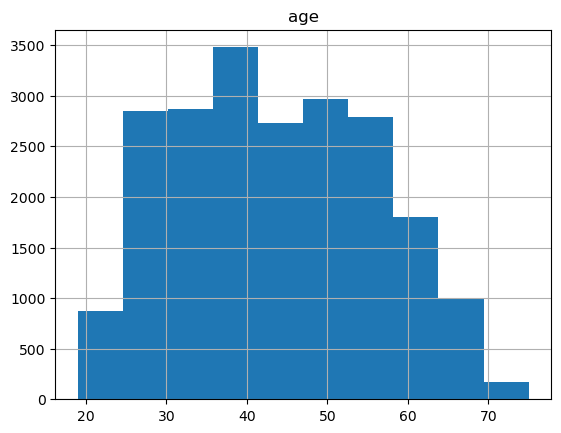

In [15]:
data_project.hist(column = 'age'); #Creating a histogram

>After analyzing this column we can see that most clients have age between 35-43 years

# "Education"
First, we need to check all data from this column and understand what move we need to take to solve any problems or mess in this column.

- (1)Let's find out how many types of education we have 
- (2)Try to understand what problems(if there are) we see and solve them one by one

In [16]:
#Here we will use "unique" method to find all unique type of education we have in our data 
data_project['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [17]:
#It seems we have a bit of equal words but with different letter types (Lower or Upper case)
#Now we can call our function lower_case and refill all cases to lower register
columns = ['education']
data_project['education'] = data_project['education'].str.lower()
data_project

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,work_types,debt,salary,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [18]:
# now let's check if what we done later  working well
data_project['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

>Now when we finished working with our "education" columns lets go to another one, to see what going on there

# "days_employed"
What we need so far from the previous work, that this column has: The missing values, values which not make any sense)-8437.6730 days of work, or  134567.1 days of work etc.) that's why we need to work properly and find the best solution to rewrite them.
In our case, we will do next:

- (1)We need the age of the workers and the middle days of work per month, that's why we will replace all problems values with functions which will give us back days of work based on the age of each worker
- (2)If values from days of work will good for our criteria we will leave them in place



In [19]:
#Now we need to check if all work well,and we dont have any missing values in our columns
data_project['days_employed'].isnull().sum()

2174

> Great, we solve it!
But not the way we need, but for the start it's ok, let's move on.
Let us write a function that will take values from the column "age" and solve our problem with values in column "days_of_employed",
and replace by this function all problematic values in our column

In [20]:
# let's propose that 222 is the average number of work days per year.
def work_days(data):
    return (data['age'] - 17) *222

data_project.loc[data_project['days_employed'] > (data_project['age'] - 17) * 222, 'days_employed'] = work_days(data_project)

In [21]:
data_project.loc[data_project['days_employed'] < (data_project['age'] - 17) * 222, 'days_employed'] = work_days(data_project)


In [22]:
data_project['days_employed'] = data_project['days_employed'].fillna(work_days(data_project))

>In the previous three-line code, we replace all values that can not make normal sense(reasons) with more real ones. And replace all 'Nan' values by our function values.
>let's check if all that we have done working properly by checking several first rows, after finding min() and max() values, and mean() and median(), just for sure to understand we worked well

In [23]:
# Let's check if we cleared all missing values in our column
data_project['days_employed'].isnull().sum()

0

In [24]:
data_project['days_employed'].head(10)

0    5550.0
1    4218.0
2    3552.0
3    3330.0
4    7992.0
5    2220.0
6    5772.0
7    7326.0
8    3996.0
9    5328.0
Name: days_employed, dtype: float64

In [25]:
# Seems nice go on 
data_project['days_employed'].min()

444.0

In [26]:
# And max
data_project['days_employed'].max()

12876.0

In [27]:
#nice lets find out mean and median 
data_project['days_employed'].mean()

5880.880557491289

In [28]:
data_project['days_employed'].median()

5550.0

>Great job! All working well, now we can go on and check another column for processing and make our way near to the finish line, where we can start to work with our Data like real Data science 👌
> But first, let's group our data by each type of work, and see to which work belongs hard workers, and then we will create a histogram that will show us how many workers worked hard in their lifetime

In [29]:
#let's find out to what category belong most hard worker
histo_days_emplo = data_project.groupby(['work_types'])['days_employed'].max()
# create a data frame for better visualization
histo_days_emplo = pd.DataFrame(histo_days_emplo)
histo_days_emplo = histo_days_emplo.astype(int)


In [30]:
# Make some good stuff to show our data in better color
cm = sns.light_palette("red", as_cmap= True)
histo_days_emplo.style.background_gradient(cmap=cm)

,days_employed
work_types,
business,12654
civil servant,12876
employee,12654
entrepreneur,9102
paternity / maternity leave,4884
retiree,12654
student,1110
unemployed,6216


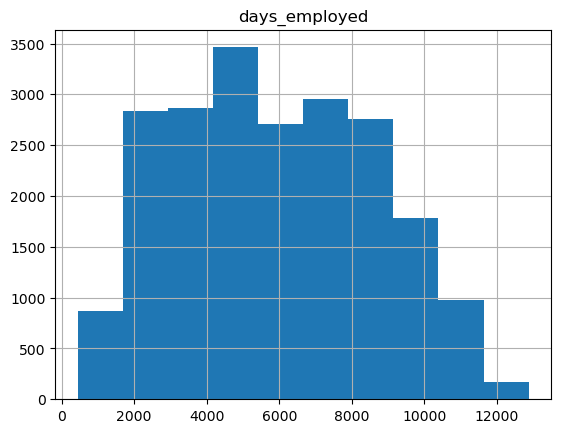

In [95]:
#creating a histogram 
data_project.hist(column= 'days_employed');

> Now we can say that our hardest workers belong to the civil servant category, and they have been working between 4000 to 6000 days in their career.



# "Children"
> let's check this one column  for problems that we have found  in another one, and find out if this column can give us a clear picture of understanding, or if we need to reprocess her.

- (1) First, we will find  max() and min() values of the children we have.
- (2) Next, if we find any problem like ("-" numbers or maybe 10+ children ) let's replace them with the mean value of children we counted for.

In [32]:
# In this step we will check max() and min() values for each person who have a children
data_project['children'].min()

-1

>Something wrong with min() value need to work with that in further 

In [33]:

# Now we will check max() value 
data_project['children'].max()

20

> By checking these two parameters we found out, that we have a mess in our column too. Let's change all our problematic values by a mean number of children because, in reality, we can't analyze how many children each unique client has.
First, we will replace all values equal to -1 by 0, and after will find the mean value and replace all mess by them.

In [34]:
# function for replacing our "-1" values by "0"
data_project['children'] = data_project['children'].replace(-1,0)

In [35]:
data_project['children'].min() # Checking if all working well

0

In [36]:
#finding mean value of children
children_mean = data_project['children'].mean()
children_mean

0.5410917537746806

In [37]:
#Let's round our value to a big one, and rewrite mean = "1"
children_mean = 1

In [38]:
#now we will replace all problem values in one column with children mean
data_project.loc[data_project['children'] > 10, 'children'] = children_mean

>let's check if our work didn't pass in the wrong direction

In [39]:
data_project['children'].max() # find max value

5

In [40]:
data_project['children'].min() # find min value

0

>Now we will find out to which category of worker have belong the biggest amount of children, and creating a bit of visualization of that

In [41]:
children_amount = data_project.groupby(['work_types'])['children'].max()
children_amount = pd.DataFrame(children_amount)
cm = sns.light_palette("yellow", as_cmap= True)
children_amount.style.background_gradient(cmap=cm)

,children
work_types,
business,5
civil servant,5
employee,5
entrepreneur,0
paternity / maternity leave,2
retiree,4
student,0
unemployed,1


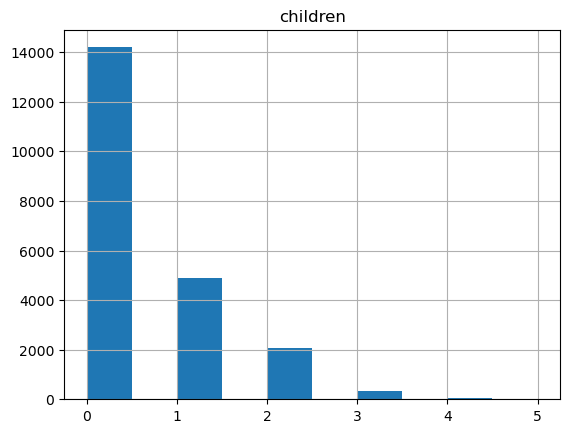

In [42]:
# Creating a histogram
data_project.hist(column= 'children');

> Here we see that the biggest amount of childrens belong to clients who has employees type of work, but most of our clients don't have any child



# Family status
Here we will work fast just to find out what unique family status we have, and if we will  find  some problems will solve it

In [43]:
data_project['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

- We can group our clients by family status and check in which category belongs most of the workers

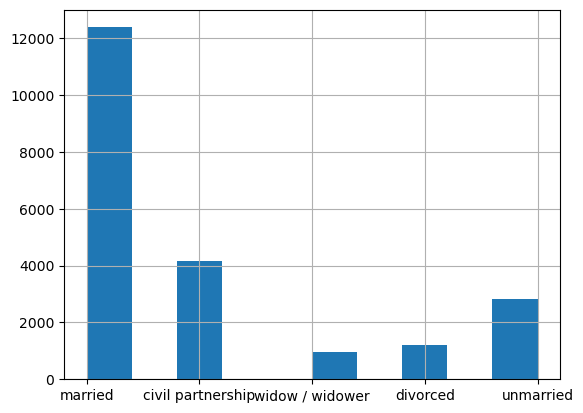

In [44]:
data_project['family_status'].hist();

Now we can see that most of our workers have married status
Let's move to the next column

# Gender 
- Let's check what mess we have or maybe don't, in this column, we will first look at unique, and if all is good go to the next column

In [45]:
data_project['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

> We see that we have some problems with 'XNA' values, lets's find how many of these problem values we have in our column and refill them with 'M'. Because in my opinion most of the ppl who go buy credit from one family a Male.

In [46]:
data_project['gender'][data_project['gender'] == 'XNA'].count()

1

In [47]:
#Now we will calculate what type of gender have most of our client
data_project['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [48]:
#From the previous code, we see that most of our clients are a Female 
#let's replace this one "XNA" with "F" type of gender and recheck if all working well
data_project['gender'] = data_project['gender'].replace('XNA','F')

In [49]:
data_project['gender'].unique()

array(['F', 'M'], dtype=object)

When the column came to work condition we can go to another one

# Workstatus
- In the same way as the last one, call the unique function and see what we have here.

In [50]:
data_project['work_types'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

Seems here all is a good go to the next column, where we found missing values and need to solve this problem for the next further steps

# Salary

- First we will find the mean value of salary more than 0, by each work_status, and after refilling our missing values
- Checking  if all working well

In [51]:
# let's find out the median from our table but only for values more than 0.
median_sal = data_project.loc[data_project['salary'] > 0].agg({'salary': 'median'})# Function to find median

In [52]:
data_project = data_project.fillna(median_sal)#replace all missing values by median

In [53]:
data_project['salary'].isnull().sum()# check if all values 0 changed

0

In [54]:
data_project.head(15)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,work_types,debt,salary,purpose
0,1,5550.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4218.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,3552.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,3330.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,7992.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,2220.0,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,5772.0,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,7326.0,50,secondary education,1,married,0,M,employee,0,21731.829,education
8,2,3996.0,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,5328.0,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


>After processing our column and checking if all our values place in good condition we can sort them by work_types and show which work has the biggest salary from the mean of all work_types

In [55]:
group_salary = data_project.groupby(['work_types'])['salary'].mean()
group_salary = pd.DataFrame(group_salary)
group_salary = group_salary.astype(int)
cm = sns.light_palette("red", as_cmap= True)
group_salary.style.background_gradient(cmap=cm)

,salary
work_types,
business,31469
civil servant,26926
employee,25560
entrepreneur,51534
paternity / maternity leave,8612
retiree,22075
student,15712
unemployed,21014


> Here we see that entrepreneur has the highest salary in our Data. Now we can go and check another column "Purpose"

# Purpose
- Check unique values 
- Solve the problems if we have 

In [56]:
data_project['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

> In this column we didn't find any mess or problem let's move on to another step

# Conclusion

There were missing values in ```days_employed``` and ```total_income``` columns. In total 10% of values were missing in each of the columns. Missing values were occurring in the same rows for the two columns. 
The total income of different job types and gender was not equal.Missing values of ```days_employed``` column was filled with values from our ```days_works``` function.
The missing values from ```salary``` we replace by the 'mean' value from ```salary``` column by using all values not equal to '0'.

# Step3
In this step we will replace all data types in our column from ```float64``` to ```int64``` and ```int64``` to ```int8``` and ```int32``` , to decrease the amount of memory. And will replace our ```object``` to ```string```

- We will create a function that will convert our types of data to another data types


In [57]:
data_project.info()#Checking  again what types have our columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   age               21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   work_types        21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  salary            21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


>Our data is  use 1.9+ MB memory let's refill it with another type () of data and find out how many memory we will free

In [62]:
columns = ['children','age','education_id','family_status_id','debt']

def convert_to(data,columns):
    for col in columns:
        data[col] = data[col].astype('int8')
    return data
data_project = convert_to(data_project,columns)

In [63]:
columns = ['days_employed','salary']

def convert_to(data,columns):
    for col in columns:
        data[col] = data[col].astype('int64')
    return data
data_project = convert_to(data_project,columns)

In [64]:
columns = ['education','family_status', 'gender', 'work_types','purpose']

def convert_to(data,columns):
    for col in columns:
        data[col] = data[col].astype('string')
    return data
data_project = convert_to(data_project,columns)

In [65]:
data_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int8  
 1   days_employed     21525 non-null  int64 
 2   age               21525 non-null  int8  
 3   education         21525 non-null  string
 4   education_id      21525 non-null  int8  
 5   family_status     21525 non-null  string
 6   family_status_id  21525 non-null  int8  
 7   gender            21525 non-null  string
 8   work_types        21525 non-null  string
 9   debt              21525 non-null  int8  
 10  salary            21525 non-null  int64 
 11  purpose           21525 non-null  string
dtypes: int64(2), int8(5), string(5)
memory usage: 1.3 MB


> Now memory decreased from 1.9+MB to 1.3MB and data type of columns changed. By the way, it is easy to read the ```days_employed``` and ```total_income``` columns.



# Step3
In this step, we will find out how many duplicates we have in our data and clean them up
- Find them and drop them 

In [66]:
data_project.duplicated().sum()

72

>What we see from the last function is that we have 72 duplicates (rows) in our table. I propose to drop them because there is not a big amount of them from all data with 21525 rows. Let's use the method to drop all duplicates from data, with function ```rese_index``` to restore our index after we deleted specific rows.

In [67]:
data_project = data_project.drop_duplicates(keep = False).reset_index()

>After we deleted our duplicates we can print() our data and look how she's changed from all steps that we have done.

In [68]:

cm = sns.light_palette("green", as_cmap= True)
data_project.head(15).style.background_gradient(cmap=cm)

,index,children,days_employed,age,education,education_id,family_status,family_status_id,gender,work_types,debt,salary,purpose
0,0,1,5550,42,bachelor's degree,0,married,0,F,employee,0,40620,purchase of the house
1,1,1,4218,36,secondary education,1,married,0,F,employee,0,17932,car purchase
2,2,0,3552,33,secondary education,1,married,0,M,employee,0,23341,purchase of the house
3,3,3,3330,32,secondary education,1,married,0,M,employee,0,42820,supplementary education
4,4,0,7992,53,secondary education,1,civil partnership,1,F,retiree,0,25378,to have a wedding
5,5,0,2220,27,bachelor's degree,0,civil partnership,1,M,business,0,40922,purchase of the house
6,6,0,5772,43,bachelor's degree,0,married,0,F,business,0,38484,housing transactions
7,7,0,7326,50,secondary education,1,married,0,M,employee,0,21731,education
8,8,2,3996,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337,having a wedding
9,9,0,5328,41,secondary education,1,married,0,M,employee,0,23108,purchase of the house for my family


# Conclusion 
 - In our data, we do not have a unique identifier for each customer. That makes things a little bit confusing. But the good thing is we have 12 columns in total, which lowers the probability of different customers having the same indicators. Additionally, duplicated rows are less than 2% of total rows. Based on these we can drop all duplicated rows.

# Step 4 
Categorize our data by differents tasks:
- We need to create two new dataframe wich will has ```education``` and ```education_id``` column, and another one ```family_status``` and ```family_status_id```. That will be our dictionary and we will call them and find any data which equal by```id ``` in main data.
- Categorize by category of salary and create a new column ```total_income_category```;
- Categorize by purpose and create a new column  ```purpose_category```.

In [69]:
education = data_project[['education','education_id']]# creating first data frame

In [70]:
education.sample(5)

,education,education_id
7892,bachelor's degree,0
14956,secondary education,1
9168,secondary education,1
14846,secondary education,1
7161,secondary education,1


In [71]:
family = data_project[['family_status','family_status_id']]# creating second data frame

In [72]:
family.sample(5)

,family_status,family_status_id
3696,civil partnership,1
5046,unmarried,4
12825,married,0
1401,civil partnership,1
10853,married,0


 - 

# Total_income_category
>Now we need to create a new column "total_income_category" which will categorize our people by salary per month

In [73]:
total_income = pd.Series({'E':'0-30000','D':'30000-50000','C':'50001-200000','B':'200001-1000000','A':'1000001+'})

In [74]:
total_income.name = 'total_income_category' #give the name to our column inside the table

In [75]:
total_income_category = pd.DataFrame(total_income)# convert to dataframe

In [76]:
total_income_category

,total_income_category
E,0-30000
D,30000-50000
C,50001-200000
B,200001-1000000
A,1000001+


In [77]:
# Functio's wich group our clients by their salary
def total_income(row):
    salary = row['salary']
    if  salary <= 30000:
        return 'E'
    elif salary<= 50000:
        return 'D'
    elif salary <= 200000:
        return 'C'
    elif salary <= 1000000:
        return 'B'
    return 'A'
    
    

>Now we will use these functions and method apply to create a new column  and merge her into  main data

In [78]:
data_project['total_income_category'] = data_project.apply(total_income, axis=1)
data_project.head(10)

,index,children,days_employed,age,education,education_id,family_status,family_status_id,gender,work_types,debt,salary,purpose,total_income_category
0,0,1,5550,42,bachelor's degree,0,married,0,F,employee,0,40620,purchase of the house,D
1,1,1,4218,36,secondary education,1,married,0,F,employee,0,17932,car purchase,E
2,2,0,3552,33,secondary education,1,married,0,M,employee,0,23341,purchase of the house,E
3,3,3,3330,32,secondary education,1,married,0,M,employee,0,42820,supplementary education,D
4,4,0,7992,53,secondary education,1,civil partnership,1,F,retiree,0,25378,to have a wedding,E
5,5,0,2220,27,bachelor's degree,0,civil partnership,1,M,business,0,40922,purchase of the house,D
6,6,0,5772,43,bachelor's degree,0,married,0,F,business,0,38484,housing transactions,D
7,7,0,7326,50,secondary education,1,married,0,M,employee,0,21731,education,E
8,8,2,3996,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337,having a wedding,E
9,9,0,5328,41,secondary education,1,married,0,M,employee,0,23108,purchase of the house for my family,E


> Let's sort our workers by their salary and show how many of them belong to each category 

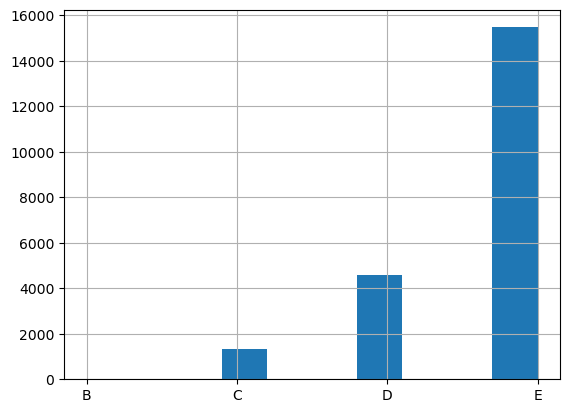

In [79]:
data_project['total_income_category'].sort_values().hist();

> Now we can analyze that most of the workers belong to the low salary category "A".

- After we categorized our workers by salary, we can take the next step. In this step, we will be grouping our clients by their purpose mean. 


# Purpose_category

>Let's write a code that will sort all clients by their needs. We will create a new column with name purpose_category

In [80]:
# Creating a stemmer
stemmer = SnowballStemmer('english')


# collect purposes in all rows, and then make a big list containing all words
# go through all words and get their stems. Sort stems according to their frequency with Counter
words =[]
for sentence in data_project['purpose']:
    word = nltk.word_tokenize(sentence)
    for w in word:
        stemmed = stemmer.stem(w)
        words.append(stemmed)
Counter(words).most_common()
    

[('a', 5079),
 ('real', 4450),
 ('estat', 4450),
 ('car', 4297),
 ('buy', 3982),
 ('hous', 3800),
 ('educ', 3508),
 ('purchas', 3298),
 ('to', 3048),
 ('of', 2990),
 ('transact', 2598),
 ('properti', 2534),
 ('my', 2384),
 ('wed', 2301),
 ('own', 2236),
 ('have', 1516),
 ('get', 1312),
 ('commerci', 1307),
 ('for', 1284),
 ('the', 1280),
 ('with', 1273),
 ('build', 1240),
 ('second-hand', 960),
 ('univers', 947),
 ('supplementari', 903),
 ('ceremoni', 785),
 ('rent', 649),
 ('out', 649),
 ('famili', 635),
 ('construct', 635),
 ('residenti', 605),
 ('renov', 604),
 ('go', 496),
 ('an', 441),
 ('profil', 436),
 ('higher', 426),
 ('becom', 404)]

In [81]:
# Now we need to create new function wich will distribute ours clients by group_purpose
def proper_category(purpose):
    stem = []
    words = nltk.word_tokenize(purpose)
    for word in words:
        stemmed = stemmer.stem(word)
        stem.append(stemmed)
    if 'hous' in  stem:
        return 'Operations with car'
    if 'univers' in stem:
        return 'Getting education'
    if 'car'in stem:
        return 'Operation with property'
    if 'wed' in stem:
        return 'Wedding celebretion'
    if 'educ' in stem:
        return 'Getting education'
    if 'properti' in stem:
        return 'Operation with property'
    else:
        return 'Another operations'


In [82]:
# Creating a new column and apply our function to this column
data_project['purpose_category'] = data_project['purpose'].apply(proper_category)

In [83]:
# Checking if our function working  correctly
data_project['purpose_category'].unique()

array(['Operations with car', 'Operation with property',
       'Getting education', 'Wedding celebretion', 'Another operations'],
      dtype=object)

In [84]:
data_project.head(10)

,index,children,days_employed,age,education,education_id,family_status,family_status_id,gender,work_types,debt,salary,purpose,total_income_category,purpose_category
0,0,1,5550,42,bachelor's degree,0,married,0,F,employee,0,40620,purchase of the house,D,Operations with car
1,1,1,4218,36,secondary education,1,married,0,F,employee,0,17932,car purchase,E,Operation with property
2,2,0,3552,33,secondary education,1,married,0,M,employee,0,23341,purchase of the house,E,Operations with car
3,3,3,3330,32,secondary education,1,married,0,M,employee,0,42820,supplementary education,D,Getting education
4,4,0,7992,53,secondary education,1,civil partnership,1,F,retiree,0,25378,to have a wedding,E,Wedding celebretion
5,5,0,2220,27,bachelor's degree,0,civil partnership,1,M,business,0,40922,purchase of the house,D,Operations with car
6,6,0,5772,43,bachelor's degree,0,married,0,F,business,0,38484,housing transactions,D,Operations with car
7,7,0,7326,50,secondary education,1,married,0,M,employee,0,21731,education,E,Getting education
8,8,2,3996,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337,having a wedding,E,Wedding celebretion
9,9,0,5328,41,secondary education,1,married,0,M,employee,0,23108,purchase of the house for my family,E,Operations with car


> Now let's find out what type of purpose is most usual in our data

In [85]:
#Creating a new column which will show us the most usual type of purpose, and using some visualization
purpose_cat = data_project['purpose_category'].value_counts()
purpose_cat = pd.DataFrame(purpose_cat)
purpose_cat.style.background_gradient(cmap=cm)

,purpose_category
Operation with property,6831
Another operations,4450
Getting education,4004
Operations with car,3800
Wedding celebretion,2301


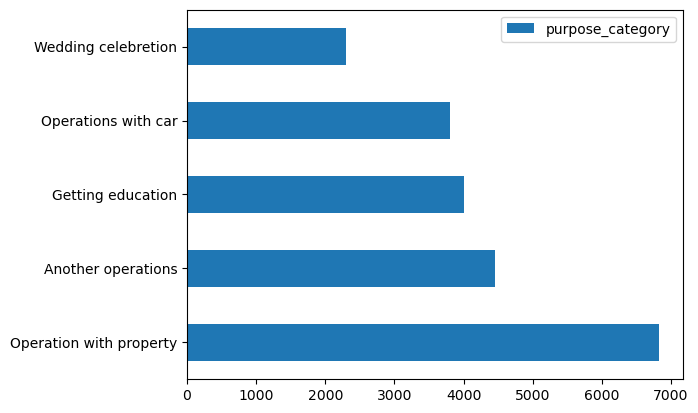

In [87]:
purpose_cat.plot.barh();

# Conclusion
- Categorization of the purposes was performed in the previous task. So here we have categorized total_income each customer get according to if they are below or above the specific quartile of the data.
- After we created a new column by using purpose from our clients we found that the most wanted purpose is  Operation with properties

# Step 3
Now we will answer the question by showing following examples from our data
- Is there a relationship between the number of children and loan repayment on time? 
- Is there a relationship between the family status and loan repayment on time? 
- Is there a relationship between the total_income and loan repayment on time? 
- How differents type of purpose and loan repayment on time? 

> First let's grouped our children by category and show how much debt each  category has


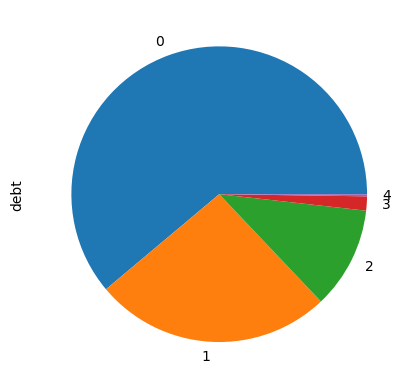

In [88]:
 data_project.groupby(['children'])['debt'].sum().plot.pie();

> What we see from this table is that most people who didn't pay the loan on time, don't have any child

In [89]:
#Now we will find what types of family status has most of the debt by grouping them and finding counts  of their debt
Family_stat_debt = data_project.groupby(['family_status'])['debt'].sum().sort_values(ascending = False)

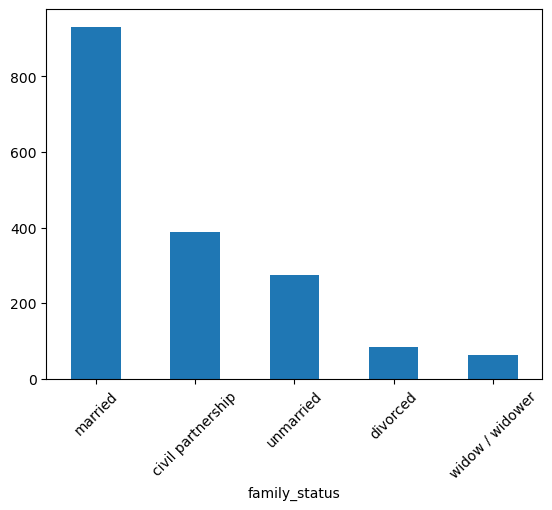

In [90]:
Family_stat_debt.plot.bar(rot=45);

> It seems most of the credit debt has married people

In [91]:
#Here we will check what types of categories by salary clients have the biggest problem with debt by grouping them and finding counts of debt
total_income_debt = data_project.groupby(['total_income_category'])['debt'].sum().sort_values(ascending = False)

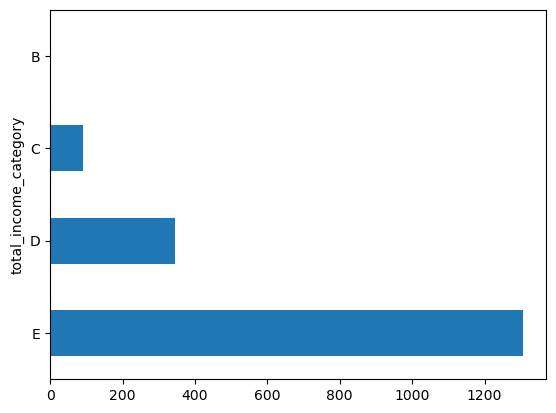

In [92]:
total_income_debt.plot.barh();

> Here we have that people with smallest salary have the bigger problems with paying loans on time

In [93]:
#Let's find out what type of purpose is most common and showing it 
data_project.groupby(['purpose_category'])['debt'].sum().sort_values(ascending = False)

purpose_category
Operation with property    593.0
Getting education          370.0
Another operations         336.0
Operations with car        256.0
Wedding celebretion        186.0
Name: debt, dtype: float64

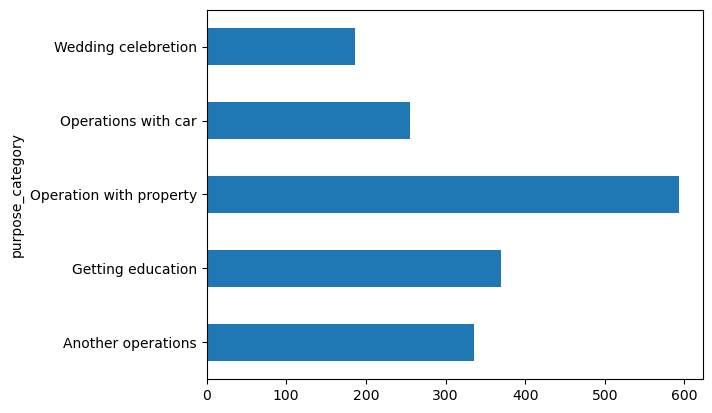

In [94]:
data_project.groupby(['purpose_category'])['debt'].sum().plot.barh();

# Conclusion
> After we reprocessed and analyzed our data we can say that most problems with paying loans on time have people:
- With the smallest salary; 
- In  married family status;
- And wanna do some operation with property;